In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # 그래프
from sklearn.cluster import KMeans # 군집화 알고리즘
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  #PCA사용


클러스터별 평균값:         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0             7.189889          0.609342     0.123047        2.214058   
1            10.067131          0.405080     0.469761        2.582570   
2             8.155467          0.535173     0.289680        3.105467   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster                                                                   
0         0.078553            13.507618             34.894737  0.995896   
1         0.100460            10.888446             30.627490  0.997574   
2         0.087235            27.108000             89.954667  0.997276   

               pH  sulphates    alcohol   quality  
cluster                                            
0        3.405762   0.609224  10.494044  5.552632  
1        3.195040   0.752131  10.724037  5.960159  
2        3.284267   0.626533   9.883156 

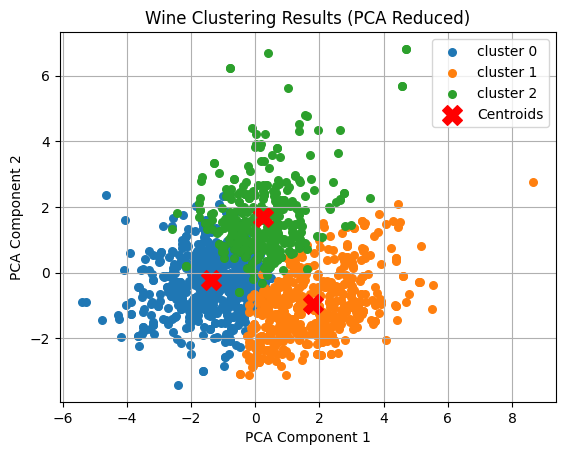

In [19]:
# 데이터 생성
df = pd.read_csv('./../../dataset/winequality-red.csv')
X = df.drop(columns=['quality'])  # 품질 점수 빼고 나머지로 군집화
y = df['quality'] # 확인용

#입력 데이터를 표준화 
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

# KMeans 클러스터링
n_clusters = 3 # 클러스터 3개
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaler)
# 클러스터 레이블을 데이터프레임에 추가
df['cluster'] = cluster_labels
cluster_means = df.groupby('cluster').mean(numeric_only=True)
print(f"클러스터별 평균값:{cluster_means}")
# PCA로 2차원 축소 (시각화용)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaler)
centroids_pca = pca.transform(kmeans.cluster_centers_)  # 중심점도 같은 차원으로 축소

# 6. 군집 시각화 (원래 코드 스타일 유지)
for cluster_label in range(3):
    cluster_points = X_pca[df['cluster'] == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'cluster {cluster_label}', s=30)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')# 중심점 시각화
plt.title("Wine Clustering Results (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


# 2 신용카드

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, confusion_matrix


In [29]:
df = pd.read_csv('./../../dataset/creditcard.csv')
print(df.info()) # 결측치 확인 (없음)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28